## ACADEMIC INTERGITY STATEMENT

We certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that we did not receive any external help, coaching or contributions during the production of this work.

### Part I: Define an RL Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import random


In [2]:
# Define an Reinforcement Learning model
class GridEnvironment(gym.Env):
    def __init__(self, X, Y):
    # Initializes the class
    # Define action and observation space
        self.x_max = X - 1
        self.y_max = Y - 1
        self.actions = ["up", "down", "right", "left"] 
        self.max_step = 2000

    def reset(self):
    # Resets the state of the environment to an initial state
        self.x = 0
        self.y = 0
        self.state_observation = [self.y, self.x]
        self.step_count = 0
        self.point = 0
        self.done = False


    def step(self, action):
    # Executes one timestep within the environment # Input to the function is an action
        if self.done == True:
            print("Already here! Not allowed to move anymore.")
        else:
            if self.step_count == self.max_step:
                print("Reach the maximum step. Mission faild.")
            else:
                self.action = action
                self.reward = self.get_reward() - 1.5
                self.point = self.point + self.reward
                self.state_observation = self.take_action()
                self.step_count += 1

        return self.step_count, self.state_observation, self.reward, self.point


    def get_reward(self):
    # Action reward given to the agent
    # If agent tries to run out of the grid, penalize -10
        if (self.x == 0 and self.action == "left") or (self.x == self.x_max and self.action == "right" ):
            return -8.5
        elif (self.y == 0 and self.action == "up") or (self.y == self.y_max and self.action == "down" ):
            return -8.5
     
    # If agent reached negative reward states, reward = -3 
        elif (self.x, self.y) == (2, 0) and self.action == "right":
            return -1.5
        elif (self.x, self.y) == (3, 1) and self.action == "up":
            return -1.5

        elif (self.x, self.y) == (0, 2) and self.action == "right":
            return -1.5
        elif (self.x, self.y) == (1, 3) and self.action == "up":
            return -1.5      
        elif (self.x, self.y) == (2, 2) and self.action == "left":
            return -1.5
        elif (self.x, self.y) == (1, 1) and self.action == "down":
            return -1.5

    # If agent reached positive reward states, reward = 1 
        elif (self.x, self.y) == (0, 0) and self.action == "right":
            return 2.5
        elif (self.x, self.y) == (1, 1) and self.action == "up":
            return 2.5
        elif (self.x, self.y) == (2, 0) and self.action == "left":
            return 2.5

        elif (self.x, self.y) == (2, 1) and self.action == "right":
            return 2.5
        elif (self.x, self.y) == (3, 2) and self.action == "up":
            return 2.5
        elif (self.x, self.y) == (3, 0) and self.action == "down":
            return 2.5

    # If agent reached Terminal state, reward = 10 
        elif (self.x, self.y) == (self.x_max-1, self.y_max) and self.action == "right":
            self.done = True
            return 11.5
        elif (self.x, self.y) == (self.x_max, self.y_max-1) and self.action == "down":
            self.done = True
            return 11.5

    # For all other states, reward = -1.5        
        else:
            return 0


    def take_action(self):
    # Actual action that agent takes.
        if self.action == "left" or self.action == "right":
            self.y = self.y

            if (self.x == 0 and self.action == "left") or (self.x == self.x_max and self.action == "right"):
                self.x = self.x
            elif (self.action == "left"):
                self.x -= 1
            elif (self.action == "right"):
                self.x += 1
            else:
                self.x = self.x
                
        elif self.action == "up" or self.action == "down":
            self.x = self.x

            if (self.y == 0 and self.action == "up") or (self.y == self.y_max and self.action == "down"):
                self.y = self.y
            elif(self.action == "up"):
                self.y -= 1
            elif(self.action == "down"):
                self.y += 1
            else:
                self.y = self.y
        else:
            self.x = self.x
            self.y = self.y

        return [self.y, self.x]



    def render(self):
    # Visualizes the environment
    # Any form like vector representation or visualizing using matplotlib will be sufficient
        grid = np.zeros((self.y_max + 1, self.x_max + 1))
        pos = self.state_observation
        goal = [self.y_max, self.x_max]

        p_reward1 = [1, 3]
        p_reward2 = [0, 1]
        n_reward1 = [0, 3]
        n_reward2 = [2, 1]

        grid[tuple(p_reward1)] = 4
        grid[tuple(p_reward2)] = 4
        grid[tuple(n_reward1)] = -2
        grid[tuple(n_reward2)] = -2

        grid[tuple(pos)] = 1
        grid[tuple(goal)] = 5
    
        plt.imshow(grid)
        

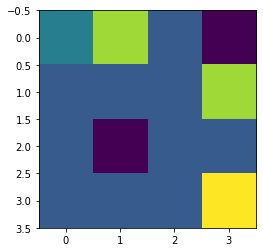

In [3]:
# Define the Environment and reset it. 
# (0, 0) is the initial agent state, (3, 3) is the Terminal state

Model = GridEnvironment(4, 4)
Model.reset()
Model.render()


This is step: 1 
The action of this step: up 
The current state: [0, 0] 
The reward get by this step: -10.0 
The total reward: -10.0 


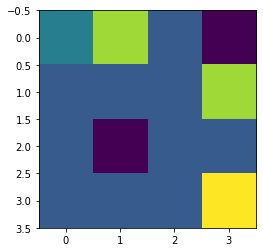

In [4]:
# Step 1
random.seed(2)
actions = ["up", "down", "right", "left"] 
i = random.randint(1, 4)
i = random.randint(1, 4)
i = random.randint(1, 4)
action = actions[i-1]
step, position, reward, total_reward = Model.step(action)

print("This is step: {} ".format(step))
print("The action of this step: {} ".format(actions[i-1]))
print("The current state: {} ".format(position))
print("The reward get by this step: {} ".format(reward))
print("The total reward: {} ".format(total_reward))
Model.render()


This is step: 2 
The action of this step: right 
The current state: [0, 1] 
The reward get by this step: 1.0 
The total reward: -9.0 


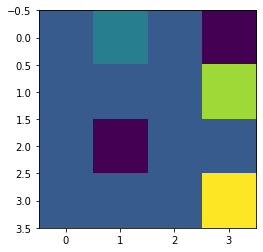

In [5]:
# Step 2
i = random.randint(1, 4)
action = actions[i-1]
step, position, reward, total_reward = Model.step(action)

print("This is step: {} ".format(step))
print("The action of this step: {} ".format(actions[i-1]))
print("The current state: {} ".format(position))
print("The reward get by this step: {} ".format(reward))
print("The total reward: {} ".format(total_reward))
Model.render()


This is step: 3 
The action of this step: down 
The current state: [1, 1] 
The reward get by this step: -1.5 
The total reward: -10.5 


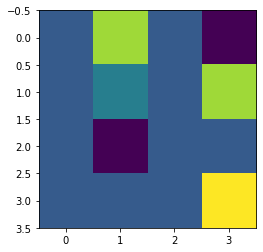

In [6]:
# Step 3
i = random.randint(1, 4)
action = actions[i-1]
step, position, reward, total_reward = Model.step(action)

print("This is step: {} ".format(step))
print("The action of this step: {} ".format(actions[i-1]))
print("The current state: {} ".format(position))
print("The reward get by this step: {} ".format(reward))
print("The total reward: {} ".format(total_reward))
Model.render()



This is step: 4 
The action of this step: right 
The current state: [1, 2] 
The reward get by this step: -1.5 
The total reward: -12.0 


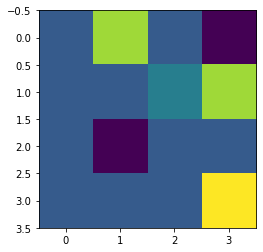

In [7]:
# Step 4
i = random.randint(1, 4)
action = actions[i-1]
step, position, reward, total_reward = Model.step(action)

print("This is step: {} ".format(step))
print("The action of this step: {} ".format(actions[i-1]))
print("The current state: {} ".format(position))
print("The reward get by this step: {} ".format(reward))
print("The total reward: {} ".format(total_reward))
Model.render()



This is step: 5 
The action of this step: right 
The current state: [1, 3] 
The reward get by this step: 1.0 
The total reward: -11.0 


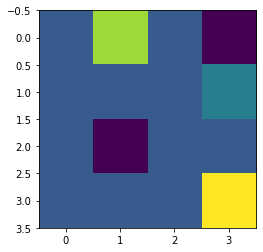

In [8]:
# Step 5
i = random.randint(1, 4)
action = actions[i-1]
step, position, reward, total_reward = Model.step(action)

print("This is step: {} ".format(step))
print("The action of this step: {} ".format(actions[i-1]))
print("The current state: {} ".format(position))
print("The reward get by this step: {} ".format(reward))
print("The total reward: {} ".format(total_reward))
Model.render()



This is step: 6 
The action of this step: down 
The current state: [2, 3] 
The reward get by this step: -1.5 
The total reward: -12.5 


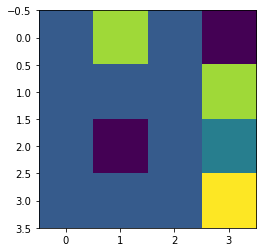

In [9]:
# Step 6
i = random.randint(1, 4)
action = actions[i-1]
step, position, reward, total_reward = Model.step(action)

print("This is step: {} ".format(step))
print("The action of this step: {} ".format(actions[i-1]))
print("The current state: {} ".format(position))
print("The reward get by this step: {} ".format(reward))
print("The total reward: {} ".format(total_reward))
Model.render()


This is step: 7 
The action of this step: up 
The current state: [1, 3] 
The reward get by this step: 1.0 
The total reward: -11.5 


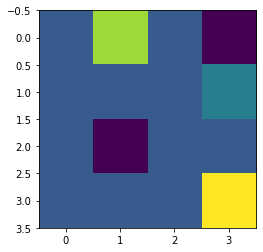

In [10]:
# Step 7
i = random.randint(1, 4)
action = actions[i-1]
step, position, reward, total_reward = Model.step(action)

print("This is step: {} ".format(step))
print("The action of this step: {} ".format(actions[i-1]))
print("The current state: {} ".format(position))
print("The reward get by this step: {} ".format(reward))
print("The total reward: {} ".format(total_reward))
Model.render()


This is step: 8 
The action of this step: down 
The current state: [2, 3] 
The reward get by this step: -1.5 
The total reward: -13.0 


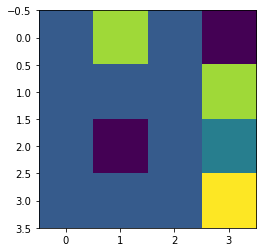

In [11]:
# Step 8
i = random.randint(1, 4)
action = actions[i-1]
step, position, reward, total_reward = Model.step(action)

print("This is step: {} ".format(step))
print("The action of this step: {} ".format(actions[i-1]))
print("The current state: {} ".format(position))
print("The reward get by this step: {} ".format(reward))
print("The total reward: {} ".format(total_reward))
Model.render()


This is step: 9 
The action of this step: left 
The current state: [2, 2] 
The reward get by this step: -1.5 
The total reward: -14.5 


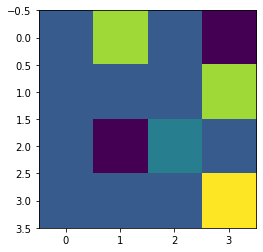

In [12]:
# Step 9
i = random.randint(1, 4)
action = actions[i-1]
step, position, reward, total_reward = Model.step(action)

print("This is step: {} ".format(step))
print("The action of this step: {} ".format(actions[i-1]))
print("The current state: {} ".format(position))
print("The reward get by this step: {} ".format(reward))
print("The total reward: {} ".format(total_reward))
Model.render()


This is step: 10 
The action of this step: left 
The current state: [2, 1] 
The reward get by this step: -3.0 
The total reward: -17.5 


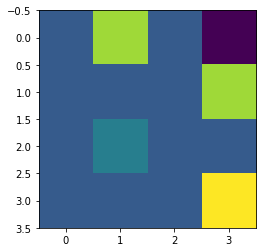

In [13]:
# Step 10
i = random.randint(1, 4)
action = actions[i-1]
step, position, reward, total_reward = Model.step(action)

print("This is step: {} ".format(step))
print("The action of this step: {} ".format(actions[i-1]))
print("The current state: {} ".format(position))
print("The reward get by this step: {} ".format(reward))
print("The total reward: {} ".format(total_reward))
Model.render()


### Part II:  Solve your environment using a tabular method – SARSA

In [155]:
# Defining the different parameters
epsilon = 0.9
epsilon_decay = 0.96
alpha = 0.1
gamma = 0.9
episodes_num = 100
max_timestep = 200
epsilon_min = 0.05

done_count = 0
total_reward_per_episode = []
epsilon_arr = []

# Initializing the Q-matrix
random.seed(3)
Q_int = np.zeros((16, 4)) 
for i in range(len(Q_int)-1):
    for j in range(len(Q_int[0])):
        Q_int[i, j] = random.randint(1, 10)

Q = Q_int
print(Q)


[[ 4. 10.  9.  3.]
 [ 6. 10.  8. 10.]
 [ 2. 10.  1.  8.]
 [ 5.  9.  4.  4.]
 [ 8.  9.  9.  8.]
 [ 7.  3.  4.  3.]
 [ 9.  7.  1.  2.]
 [ 3. 10.  1.  5.]
 [ 1.  5.  8. 10.]
 [ 7.  7.  7. 10.]
 [ 8.  3.  6.  2.]
 [ 1.  3.  8.  4.]
 [ 5.  7.  5.  7.]
 [ 9.  7. 10.  6.]
 [ 9. 10.  7. 10.]
 [ 0.  0.  0.  0.]]


In [156]:
# Function to choose the next action
def choose_action(Q, position):

    state = position[0]*4 + position[1]
    action = 0
    if random.random() < epsilon:
        action = random.randint(1, 4) - 1
    else:
        action = np.argmax(Q[state, :])

    return action

In [157]:
# SARSA
for episode in range(episodes_num):

    Model = GridEnvironment(4, 4)
    Model.reset()
    position = [0, 0]
    
    for steps in range(max_timestep):

        action = choose_action(Q, position)
        prev_position = position
        step, position, reward, total_reward = Model.step(actions[action])
        est_action = choose_action(Q, position)
        prev_state = prev_position[0]*4 + prev_position[1]
        state = position[0]*4 + position[1]

        Q[prev_state, action] = Q[prev_state, action] + alpha * (reward + gamma * Q[state, est_action] - Q[prev_state, action])
        
        if position == [3, 3]:
            done_count += 1
            break
    
    total_reward_per_episode.append(total_reward)
    epsilon_arr.append(epsilon)
    if episode >= epsilon_min:
        epsilon = epsilon * epsilon_decay

# print(done_count)
print("The final Q matrix: ")
print(Q)

The final Q matrix: 
[[-6.91251167  0.73279022  1.50975682 -5.33806449]
 [-6.11268369  0.47509205  0.72300206  0.46439232]
 [-6.67371607  2.76182084  1.28629186  1.99905945]
 [ 1.54983106  6.18905623 -0.03096121  3.98202645]
 [ 2.02440464  1.98912794  1.86011496 -2.38413775]
 [ 1.88768137  1.84082777  2.12047688  1.4697404 ]
 [ 2.44593918  5.05491516  2.94516162  2.11234818]
 [ 3.12877526  5.35235011 -0.36535553  4.1800368 ]
 [ 1.98969095  3.00050845  2.87145785  1.75797206]
 [ 4.42089953  4.70186724  4.64694887  4.52126657]
 [ 4.0962345   5.19254664  7.44860253  2.2169748 ]
 [ 2.38871357  9.99331497  1.79616325  3.55752702]
 [ 4.35452837  2.62797086  4.49781917  1.71483693]
 [ 6.21963853  2.33347074  7.09834623  4.75689742]
 [ 6.48608556  6.7513223   9.91656148  7.15128166]
 [ 0.          0.          0.          0.        ]]


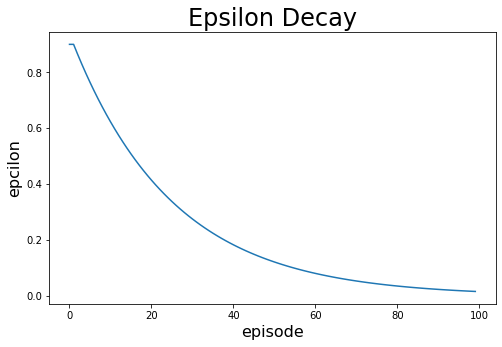

In [158]:
# Visualization graphs - Epcilon Decay
y1 = epsilon_arr

plt.figure(figsize=(8, 5))
plt.plot(y1)
plt.title('Epsilon Decay', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('epcilon', fontsize = 16)
plt.show()


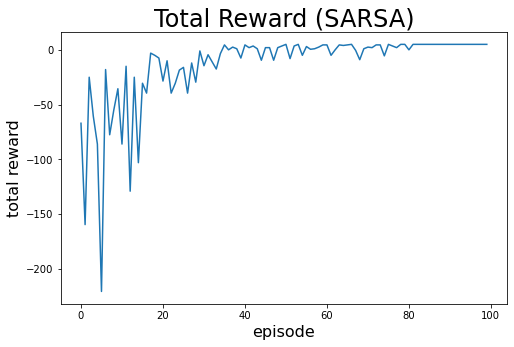

In [159]:
# Visualization graphs - Total Rrwards
y2 = total_reward_per_episode

plt.figure(figsize=(8, 5))
plt.plot(y2)
plt.title('Total Reward (SARSA)', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('total reward', fontsize = 16)
plt.show()


In [86]:
# Run the environment with the agent chooses only greedy actions from the learnt policy.
episodes_num = 100
max_timestep = 50

total_reward_per_episode = []

for episode in range(episodes_num):

    Model = GridEnvironment(4, 4)
    Model.reset()
    position = [0, 0]
    state = 0
    action = np.argmax(Q[state, :])

    for steps in range(max_timestep):

        action = np.argmax(Q[state, :])
        step, position, reward, total_reward = Model.step(actions[action])
        state = position[0]*4 + position[1]

        if position == [3, 3]:
            break
    
    total_reward_per_episode.append(total_reward)


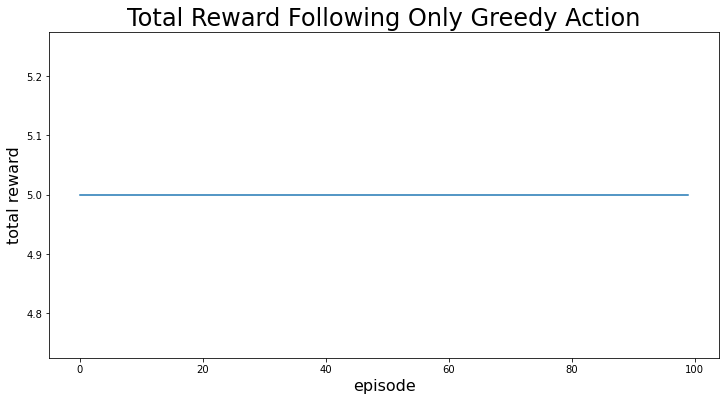

In [87]:
# Visualization graphs - Total Rrwards
y3 = total_reward_per_episode

plt.figure(figsize=(12, 6))
plt.plot(y3)
plt.title('Total Reward Following Only Greedy Action', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('total reward', fontsize = 16)
plt.show()


In [95]:
# Changing the parameters - larger epsilon min
epsilon = 0.9
epsilon_decay = 0.96
alpha = 0.1
gamma = 0.9
episodes_num = 100
max_timestep = 200
epsilon_min = 0.3

total_reward_per_episode = []
epsilon_arr = []
# Initializing the Q-matrix
Q = Q_int


In [96]:
# SARSA

for episode in range(episodes_num):

    Model = GridEnvironment(4, 4)
    Model.reset()
    position = [0, 0]
    
    for steps in range(max_timestep):

        action = choose_action(Q, position)
        prev_position = position
        step, position, reward, total_reward = Model.step(actions[action])
        est_action = choose_action(Q, position)
        prev_state = prev_position[0]*4 + prev_position[1]
        state = position[0]*4 + position[1]

        Q[prev_state, action] = Q[prev_state, action] + alpha * (reward + gamma * Q[state, est_action] - Q[prev_state, action])
        
        if position == [3, 3]:
            done_count += 1
            break
    epsilon_arr.append(epsilon)
    if epsilon >= epsilon_min:
        epsilon = epsilon * epsilon_decay
    total_reward_per_episode.append(total_reward)

# print(done_count)
print("The final Q matrix: ")
print(Q)

The final Q matrix: 
[[-11.80670951  -2.58443459   0.04144918 -11.51506986]
 [-11.38233975  -0.41049936  -1.1244812   -4.36491264]
 [ -8.77881636   2.24774662   0.69727992   0.90325863]
 [ -1.66141139   5.085378    -1.17377449   0.90677108]
 [ -3.33291842  -0.29240338  -0.1331371   -8.40158901]
 [ -0.96787956  -0.51742925   2.00622769  -2.04588393]
 [ -0.08076202   3.3489274    5.24487564  -0.35854195]
 [  0.63566223   6.16580838  -5.48830195   1.60118298]
 [ -0.18653042   0.49013323   0.83878019  -0.21991357]
 [  1.01479873   2.63270529   2.09336935   1.06363225]
 [  2.48536581   6.48157434   3.70214109   0.21338521]
 [  3.26892916  10.          -1.64067642   3.21394957]
 [  2.41310181  -1.33097317   3.12481209  -3.35104917]
 [  1.37705837  -0.84714163   6.33341534   2.51809855]
 [  3.81754195  -0.60497304   9.9998334    3.63251413]
 [  0.           0.           0.           0.        ]]


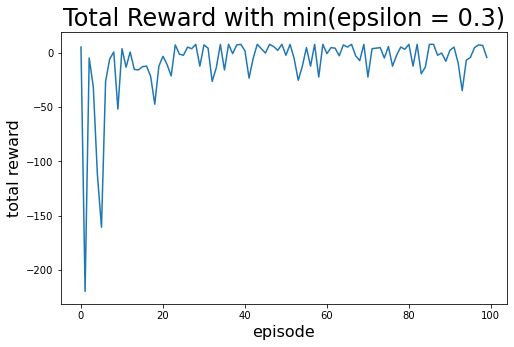

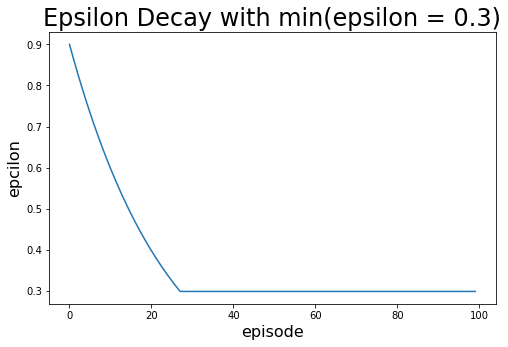

In [97]:
# Visualization graphs - Total Rrwards
y2 = total_reward_per_episode

plt.figure(figsize=(8, 5))
plt.plot(y2)
plt.title('Total Reward with min(epsilon = 0.3)', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('total reward', fontsize = 16)
plt.show()

# Visualization graphs - Epcilon Decay
y1 = epsilon_arr

plt.figure(figsize=(8, 5))
plt.plot(y1)
plt.title('Epsilon Decay with min(epsilon = 0.3)', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('epcilon', fontsize = 16)
plt.show()

In [101]:
# Changing the parameters - smaller epsilon min
epsilon = 0.9
epsilon_decay = 0.96
alpha = 0.1
gamma = 0.9
episodes_num = 100
max_timestep = 200
epsilon_min = 0.001

total_reward_per_episode = []
epsilon_arr = []
# Initializing the Q-matrix
Q = Q_int


In [104]:
# SARSA

for episode in range(episodes_num):

    Model = GridEnvironment(4, 4)
    Model.reset()
    position = [0, 0]
    
    for steps in range(max_timestep):

        action = choose_action(Q, position)
        prev_position = position
        step, position, reward, total_reward = Model.step(actions[action])
        est_action = choose_action(Q, position)
        prev_state = prev_position[0]*4 + prev_position[1]
        state = position[0]*4 + position[1]

        Q[prev_state, action] = Q[prev_state, action] + alpha * (reward + gamma * Q[state, est_action] - Q[prev_state, action])
        
        if position == [3, 3]:
            done_count += 1
            break
    epsilon_arr.append(epsilon)
    if epsilon > epsilon_min:
        epsilon = epsilon * epsilon_decay
    total_reward_per_episode.append(total_reward)

# print(done_count)
print("The final Q matrix: ")
print(Q)

The final Q matrix: 
[[-1.20667654e+01 -3.11211269e+00  4.07666132e+00 -1.38835159e+01]
 [-1.19056045e+01  2.81735774e+00 -1.30928843e+00 -5.62145503e+00]
 [-8.89230684e+00  2.84432098e+00 -1.45771462e+00 -7.66157083e-01]
 [-7.80800721e+00  2.84204848e+00 -8.52669588e+00 -8.17258471e-01]
 [-4.56706684e+00 -1.34681483e+00  2.98156486e-01 -9.29967349e+00]
 [-9.72726532e-01 -1.28153853e+00  5.47472106e+00 -2.92266394e+00]
 [ 3.41964820e-01  2.69259783e+00  7.74999655e+00 -1.71482183e-01]
 [-2.38853824e+00  7.49999982e+00 -7.71180684e+00  1.86359559e+00]
 [-2.41495279e+00 -9.93212560e-01 -8.76222915e-01 -2.37592596e+00]
 [ 3.39842214e-03  1.17489292e+00  2.03592506e+00  2.26821471e-01]
 [ 1.72789941e+00  3.68717998e+00  6.03904386e+00 -5.49284868e-01]
 [ 2.61957194e+00  1.00000000e+01 -2.73795515e+00  2.72590848e+00]
 [ 1.38398905e+00 -2.62773466e+00  1.83996240e+00 -5.47345180e+00]
 [ 1.03068442e+00 -2.68271650e+00  3.40424300e+00  2.05224929e+00]
 [ 2.88358741e+00 -3.22034055e+00  9.9999

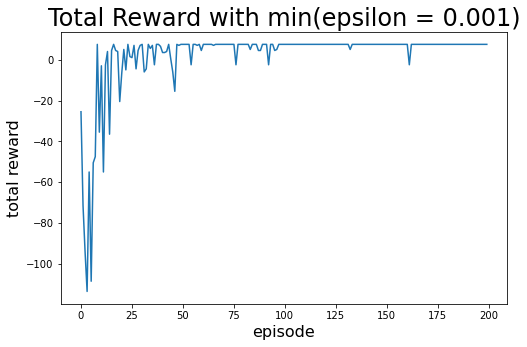

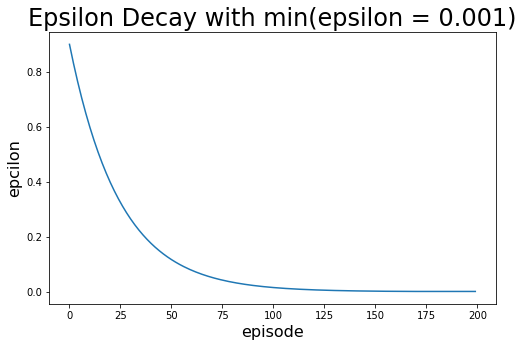

In [105]:
# Visualization graphs - Total Rrwards
y2 = total_reward_per_episode

plt.figure(figsize=(8, 5))
plt.plot(y2)
plt.title('Total Reward with min(epsilon = 0.001)', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('total reward', fontsize = 16)
plt.show()

# Visualization graphs - Epcilon Decay
y1 = epsilon_arr

plt.figure(figsize=(8, 5))
plt.plot(y1)
plt.title('Epsilon Decay with min(epsilon = 0.001)', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('epcilon', fontsize = 16)
plt.show()

In [130]:
# Changing the parameters - larger alpha
epsilon = 0.9
epsilon_decay = 0.96
alpha = 0.8
gamma = 0.9
episodes_num = 100
max_timestep = 200
epsilon_min = 0.05

total_reward_per_episode = []

# Initializing the Q-matrix
Q = Q_int


In [131]:
# SARSA
for episode in range(episodes_num):

    Model = GridEnvironment(4, 4)
    Model.reset()
    position = [0, 0]
    
    for steps in range(max_timestep):

        action = choose_action(Q, position)
        prev_position = position
        step, position, reward, total_reward = Model.step(actions[action])
        est_action = choose_action(Q, position)
        prev_state = prev_position[0]*4 + prev_position[1]
        state = position[0]*4 + position[1]

        Q[prev_state, action] = Q[prev_state, action] + alpha * (reward + gamma * Q[state, est_action] - Q[prev_state, action])
        
        if position == [3, 3]:
            done_count += 1
            break
    
    if epsilon > epsilon_min:
        epsilon = epsilon * epsilon_decay
    total_reward_per_episode.append(total_reward)

# print(done_count)
print("The final Q matrix: ")
print(Q)

The final Q matrix: 
[[ -8.6589022   -6.57392504   2.26225    -13.45038465]
 [-17.1415329    1.4025     -16.68843689  -2.49586858]
 [-14.9007263   -9.50600123  -7.84643854  -5.1316252 ]
 [-20.90098348 -11.99514055 -22.03900373 -17.52480221]
 [ -6.46779934  -2.89378162  -8.46626847 -19.59825179]
 [ -0.55241658 -12.38969149   3.225      -13.47871157]
 [ -4.82721725   5.25         3.79527449  -9.93346242]
 [-16.01342673   7.49938947 -10.62352008  -3.55105859]
 [-12.77352445  -0.64781623  -3.9918761  -20.07253968]
 [-11.92723709  -8.80028072   4.48013515 -21.61622224]
 [ -1.41124105  -6.22409997   7.5         -3.187064  ]
 [  7.36489548  10.          -1.00353526   4.88498811]
 [-12.55894227 -15.05764376  -0.15065147 -28.52261521]
 [-11.22424412  -6.23084798   6.2029776   -0.27891815]
 [ -7.33651348  -2.20037872  10.           1.37631764]
 [  0.           0.           0.           0.        ]]


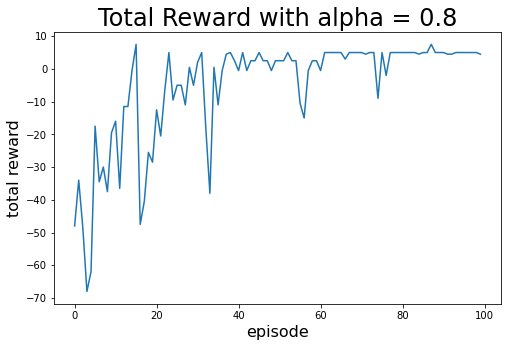

In [132]:
# Visualization graphs - Total Rrwards
y2 = total_reward_per_episode

plt.figure(figsize=(8, 5))
plt.plot(y2)
plt.title('Total Reward with alpha = 0.8', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('total reward', fontsize = 16)
plt.show()


In [152]:
# Changing the parameters - smaller alpha
epsilon = 0.9
epsilon_decay = 0.96
alpha = 0.02
gamma = 0.9

total_reward_per_episode = []

# Initializing the Q-matrix
Q = Q_int


In [153]:
# SARSA
for episode in range(episodes_num):

    Model = GridEnvironment(4, 4)
    Model.reset()
    position = [0, 0]
    
    for steps in range(max_timestep):

        action = choose_action(Q, position)
        prev_position = position
        step, position, reward, total_reward = Model.step(actions[action])
        est_action = choose_action(Q, position)
        prev_state = prev_position[0]*4 + prev_position[1]
        state = position[0]*4 + position[1]

        Q[prev_state, action] = Q[prev_state, action] + alpha * (reward + gamma * Q[state, est_action] - Q[prev_state, action])
        
        if position == [3, 3]:
            done_count += 1
            break
    
    if epsilon > epsilon_min:
        epsilon = epsilon * epsilon_decay
    total_reward_per_episode.append(total_reward)

# print(done_count)
print("The final Q matrix: ")
print(Q)

The final Q matrix: 
[[-15.20496162  -1.72141393  -4.395551   -12.1882534 ]
 [ -8.22133583   0.8160028   -9.26627531 -11.01910733]
 [-10.91652455  -5.17362817  -8.47599353   1.22523056]
 [-16.82303216  -0.1692214  -11.06331894  -7.09316116]
 [ -7.18364693 -11.75037864   0.37182813 -14.0837259 ]
 [ -0.84651182  -0.17190828   2.2996194   -6.91977453]
 [ -1.05628355   4.6044882    2.14355848  -4.26626671]
 [ -2.19079999  -5.04052756  -7.51129156   2.84740718]
 [-12.40948393 -14.39564074  -6.54514333 -15.72946172]
 [ -1.31994913  -8.94707571   5.1031871   -5.9534756 ]
 [  2.2483424    6.26642495   7.07345758   0.21631678]
 [  7.39168965  10.          -1.33281232  -4.48127965]
 [ -3.25575072 -23.94125055 -10.3432136  -16.85442261]
 [ -7.77904716 -25.35235345  -8.09333017  -8.02901557]
 [  4.01038045  -9.95325615  10.           2.63008912]
 [  0.           0.           0.           0.        ]]


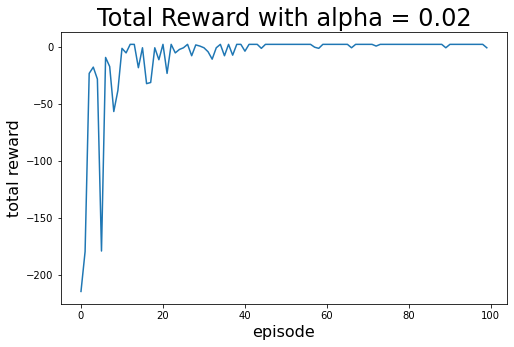

In [154]:
# Visualization graphs - Total Rrwards
y2 = total_reward_per_episode

plt.figure(figsize=(8, 5))
plt.plot(y2)
plt.title('Total Reward with alpha = 0.02', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('total reward', fontsize = 16)
plt.show()


In [33]:
# Changing the parameters - larger gamma
epsilon = 0.9
epsilon_decay = 0.96
alpha = 0.1
gamma = 1

total_reward_per_episode = []

# Initializing the Q-matrix
Q = Q_int


In [34]:
# SARSA
for episode in range(episodes_num):

    Model = GridEnvironment(4, 4)
    Model.reset()
    position = [0, 0]
    
    for steps in range(max_timestep):

        action = choose_action(Q, position)
        prev_position = position
        step, position, reward, total_reward = Model.step(actions[action])
        est_action = choose_action(Q, position)
        prev_state = prev_position[0]*4 + prev_position[1]
        state = position[0]*4 + position[1]

        Q[prev_state, action] = Q[prev_state, action] + alpha * (reward + gamma * Q[state, est_action] - Q[prev_state, action])
        
        if position == [3, 3]:
            done_count += 1
            break
    
    epsilon = epsilon * epsilon_decay
    total_reward_per_episode.append(total_reward)

# print(done_count)
print("The final Q matrix: ")
print(Q)

The final Q matrix: 
[[-18.58247272 -13.57654261  -0.09148049 -16.58000061]
 [-14.03856984  -4.71233298   0.9001427   -8.14915934]
 [-10.68348681   4.33530871  -0.79668729  -3.74898659]
 [ -8.22285498   3.63647618 -14.07220357  -3.40788764]
 [-15.70276483  -7.28397874  -5.00944461 -16.23862538]
 [ -4.421956    -3.12789306   0.33111153 -10.97520928]
 [ -1.49576941  -0.11539238   7.04669353  -2.50142982]
 [ -6.52310236   6.72735388  -6.93650809  -0.82650543]
 [-10.89430889  -5.65193435  -1.87880509 -10.81287518]
 [ -2.88198794   0.28211159   3.10011402  -5.79250358]
 [ -0.92267973   3.48221842  -0.59932258  -2.74579142]
 [  5.64942542  10.          -1.39039002  -0.25295722]
 [ -7.94182637  -8.19088029  -5.7782517  -15.4596148 ]
 [ -0.68976167  -5.9927778    6.27121066  -4.39476296]
 [  0.48260874  -5.5143154   10.           0.86668014]
 [  0.           0.           0.           0.        ]]


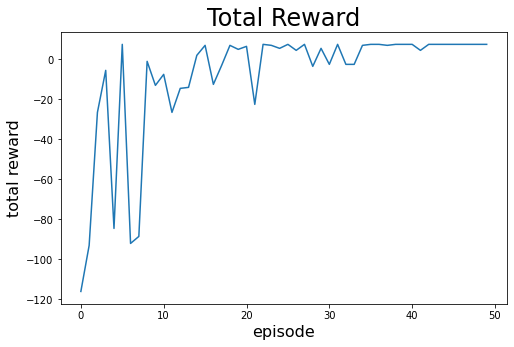

In [35]:
# Visualization graphs - Total Rrwards
y2 = total_reward_per_episode

plt.figure(figsize=(8, 5))
plt.plot(y2)
plt.title('Total Reward', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('total reward', fontsize = 16)
plt.show()


In [36]:
# Changing the parameters - smaller gamma
epsilon = 0.9
epsilon_decay = 0.96
alpha = 0.1
gamma = 0.3

total_reward_per_episode = []

# Initializing the Q-matrix
Q = Q_int


In [37]:
# SARSA
for episode in range(episodes_num):

    Model = GridEnvironment(4, 4)
    Model.reset()
    position = [0, 0]
    
    for steps in range(max_timestep):

        action = choose_action(Q, position)
        prev_position = position
        step, position, reward, total_reward = Model.step(actions[action])
        est_action = choose_action(Q, position)
        prev_state = prev_position[0]*4 + prev_position[1]
        state = position[0]*4 + position[1]

        Q[prev_state, action] = Q[prev_state, action] + alpha * (reward + gamma * Q[state, est_action] - Q[prev_state, action])
        
        if position == [3, 3]:
            done_count += 1
            break
    
    epsilon = epsilon * epsilon_decay
    total_reward_per_episode.append(total_reward)

# print(done_count)
print("The final Q matrix: ")
print(Q)

The final Q matrix: 
[[-15.11147256  -8.87609142   0.18559327 -14.50920173]
 [-12.85571408  -3.71140416  -2.10860857  -5.98606063]
 [-10.37558627  -1.14246384  -2.90648028  -1.51431907]
 [ -9.03958332   1.8488509  -12.62482134  -3.04218236]
 [-11.8854279   -6.34051879  -4.33183733 -15.54112015]
 [ -3.64040012  -3.2015634   -0.77599665  -9.29674199]
 [ -1.49082469  -0.75885348   1.17330968  -2.5291075 ]
 [ -4.79680769   0.48148988  -9.21581367  -1.15204201]
 [-10.89430889  -5.31295479  -2.25747963 -10.86854527]
 [ -2.88198794  -0.07588291   0.86650392  -5.42956413]
 [ -1.08188626   1.36193213  -0.44305523  -2.84005721]
 [  4.5243791   10.          -4.10445562  -0.83673701]
 [ -7.06838986  -8.61004706  -5.7782517  -15.4596148 ]
 [ -1.00724514  -5.9927778    5.0791589   -4.39476296]
 [  0.14367068  -5.79659547  10.           0.57221003]
 [  0.           0.           0.           0.        ]]


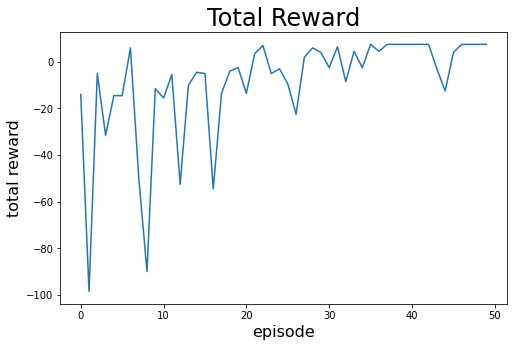

In [38]:
# Visualization graphs - Total Rrwards
y2 = total_reward_per_episode

plt.figure(figsize=(8, 5))
plt.plot(y2)
plt.title('Total Reward', fontsize = 24)
plt.xlabel('episode', fontsize = 16)
plt.ylabel('total reward', fontsize = 16)
plt.show()


## References Used

#### List below all the references you used to complete the assignment

https://www.w3schools.com/python/
<br>https://gym.openai.com/docs/
<br>https://blog.paperspace.com/getting-started-with-openai-gym/


